## Automatic Fake News Text Classification Model Using NLP Techniques

   ## By : Assefa Chekole


# Contents:
  ### Part -> 1:Setup of Required Libraries
  ### part ->2:Loading the News datasets
  ### part ->3: performing pre-processing of News datasets
    <->: Remove any blank rows in Data
    <->:Change all the text to lower case
    <->:Word Tokenization and Lemmatization
    <->:Remove Stop words
    <->:Remove Non-alpha text...etc.
 ### part ->4: Implementing the Model
    <->:Spliting the datasets in to training and testing sets
    <->:encoding the datasets in to source and target class 
    <->:Converting the News  data to vectors using TF-IDF 
    <->:Evaluating the classifier

## Part 1: Setup & Adding the required libraries

In [1]:
# Standard Libraries
import pandas as pd 
import numpy as np 

# Data Preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection, svm
from collections import Counter


# Performance metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report



# Visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asse\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


  ### part -> 2:Loading the News datasets

In [2]:
fake_df = pd.read_csv('C:/Users/Asse/Fake.csv')
real_df = pd.read_csv('C:/Users/Asse/True.csv')

In [3]:
# category Names:
fake_news_category = ('title', 'text', 'subject', 'date')
real_news_category = ('title', 'text', 'subject', 'date')

In [4]:
fake_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [5]:
real_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [6]:
# checking Null values from the fake and real datasets

fake_df.isnull().sum()
real_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [7]:
# Removing the Subject and Date categories
# the subject category in both datasets are not distributed evenly. I removed that part,
# to enhance the accuracy of the classifier.

fake_df.drop(['date', 'subject'], axis=1, inplace=True)
real_df.drop(['date', 'subject'], axis=1, inplace=True)

In [8]:
# Creating New class for the news datasets to be labeled as 0 for fake news, and 1 for real/True news.

fake_df['class'] = 0 
real_df['class'] = 1

In [9]:
# the class for fake news are labeled as '0'. here is  sample of the first five fake news datasets.


fake_df[0:5][["text","class"]] 


,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [10]:
# the class for true/ real news are labeled as '1'. here is  sample of the first five real news datasets.

real_df[0:5][["text","class"]] 


,text,class
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


Text(0, 0.5, 'Number of News Articles')

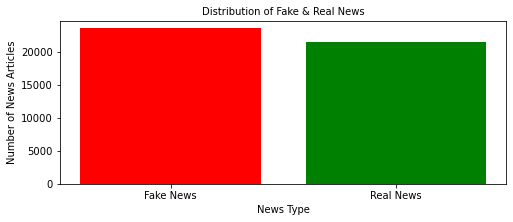

In [11]:
# Distributions of Fake and Real News: this is to know the balance of the datasets

plt.figure(figsize=(8, 3))
plt.bar('Fake News', len(fake_df), color='red')
plt.bar('Real News', len(real_df), color='green')
plt.title('Distribution of Fake & Real News', size=10)
plt.xlabel('News Type', size=10)
plt.ylabel('Number of News Articles', size=10)

## Merging the fake and real news datasets in to a single file:


In [12]:
# Merging the fake and real news datasets in to a single file:

News_type = pd.concat([fake_df, real_df], ignore_index=True, sort=False)

In [13]:
# to make the classifier process easier I have Merged the title with the text headings.

News_type['News'] = News_type['title'] + News_type['text']

News_type.drop(['title', 'text'], axis=1, inplace=True)

In [14]:
# Reordering the column headings 

News_type[['News', 'class']]

,News,class
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0
...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,1
44894,LexisNexis withdrew two products from Chinese ...,1
44895,Minsk cultural hub becomes haven from authorit...,1
44896,Vatican upbeat on possibility of Pope Francis ...,1


  ### part -> 3: performing pre-processing of News datasets

In [15]:
import re 
def clean_str(string):
    """
    Tokenization/string cleaning for dataset
    Every dataset is lower cased except
    """
    string = re.sub('https?://\S+|www\.\S+', '', string)
    string = re.sub(' $', '', string)
    string = re.sub(r"\n", "", string)    
    string = re.sub(r"\r", "", string) 
    string = re.sub(r"[0-9]", "digit", string)
    string = re.sub(r"\'", "", string)    
    string = re.sub(r"\"", "", string)    
    return string.strip().lower()
X = []
for i in range(News_type.shape[0]):
    X.append(clean_str(News_type.iloc[i][1]))
y = np.array(News_type["News"])

In [16]:
# Data Cleaning, Making the News dataset in to all lower case:
    
News_type["News"] = News_type["News"].str.lower()


In [17]:
stop_words = stopwords.words('english')
News_type['news_title'] = News_type['News'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


In [19]:
# checking the stop words were removed and all are lowercase.

News_type['news_title'][:5]

0    donald trump sends embarrassing new year’s eve...
1    drunk bragging trump staffer started russian c...
2    sheriff david clarke becomes internet joke thr...
3    trump obsessed even obama’s name coded website...
4    pope francis called donald trump christmas spe...
Name: news_title, dtype: object

## Sample datasets for experimentation

In [20]:
# Sample dataset size: 10000 

News_type_sample = News_type.sample(n=10000) #random state


 # part -> 4: Implementing the Model

## Training & Testing sets Splits:

In [22]:
# Split into training and testing sets: 70% of training and 30% for testing: and Encoding the labels.

news_source = News_type_sample['news_title']
news_targets = News_type_sample['class']

X_train, X_test, y_train, y_test = train_test_split(news_source, news_targets, test_size=0.30, train_size=0.70, random_state=24)

## Count Vectorizer

In [23]:
# Count Vectorizer Normal

count_vec = CountVectorizer(stop_words='english', max_features=None)

count_vec = CountVectorizer()

xtrain_cv = count_vec.fit_transform(X_train)
xtest_cv = count_vec.transform(X_test)

xtrain_cv.shape

(7000, 58775)

## Tf-Idf Vectorizer

In [24]:
# Tf-Idf Vectorizer  Normal (Convert text data in to vectors, since the  classifier only takes numerical data) 


Tfidf_vect = TfidfVectorizer(stop_words='english', max_features=None)     # Initialize a TfidfVectorizer object:

Tfidf_vect.fit(X_train)        

X_train_Tfidf = Tfidf_vect.transform(X_train)                      # Transform the training data: tfidf_train

X_test_Tfidf = Tfidf_vect.transform(X_test)                         # Transform the test data: tfidf_test 

X_train_Tfidf.shape

(7000, 58468)

## Printing the TF-IDF Vocabulary

In [25]:
# Printing the out put of the Vocabulary:

print(Tfidf_vect.vocabulary_)

{'watch': 56477, 'brian': 8839, 'stelter': 49779, 'slams': 48188, 'sean': 46553, 'hannity': 24071, 'disturbing': 16603, 'lies': 31144, 'hillary': 24926, 'clinton': 11650, 'video': 55680, 'called': 9662, 'segment': 46707, 'cnn': 11788, 'reliable': 43609, 'sources': 48871, 'sunday': 50612, 'morning': 34837, 'ridiculous': 44616, 'claims': 11445, 'past': 38812, 'week': 56682, 'health': 24462, 'case': 10145, 'know': 29747, 'strange': 50063, 'right': 44637, 'wing': 57150, 'conspiracy': 12842, 'going': 22840, 'severe': 47041, 'problems': 41225, 'leading': 30660, 'propagator': 41450, 'claim': 11440, 'cojones': 11962, 'evidence': 19228, 'allegations': 4152, 'provided': 41602, 'associated': 5691, 'press': 41008, 'reporter': 43894, 'named': 35522, 'lisa': 31348, 'lerer': 30924, 'fictitious': 20448, 'definitively': 15069, 'proving': 41614, 'fact': 19791, 'suffering': 50498, 'seizures': 46735, 'story': 50021, 'snippet': 48516, 'read': 42783, 'debunking': 14801, 'article': 5453, 'conservative': 1279

## printing the vectorized feature names:


In [26]:
# printing the vectorized feature names:

# Output:1: shows Row number of ‘X_train_Tfidf’, 
# Output 2: shows Unique Integer number of each word in the first row, 
# Output 3: shows Score calculated by TF-IDF Vectorizer


vectorizer = TfidfVectorizer(max_features=20)
news_text = vectorizer.fit_transform(X_train).todense()
feature_names = pd.DataFrame(news_text, columns=vectorizer.get_feature_names())

print(feature_names)

          also  clinton     could    donald  government     house       new  \
0     0.000000      1.0  0.000000  0.000000    0.000000  0.000000  0.000000   
1     0.335216      0.0  0.000000  0.341122    0.400889  0.000000  0.000000   
2     0.000000      0.0  0.000000  0.000000    0.000000  0.000000  0.000000   
3     0.000000      0.0  0.000000  0.000000    0.000000  0.000000  0.000000   
4     0.000000      0.0  0.000000  0.295440    0.000000  0.000000  0.000000   
...        ...      ...       ...       ...         ...       ...       ...   
6995  0.000000      0.0  0.000000  0.000000    0.000000  0.000000  0.000000   
6996  0.000000      0.0  0.000000  0.000000    0.589459  0.000000  0.000000   
6997  0.241474      0.0  0.409846  0.000000    0.000000  0.293573  0.000000   
6998  0.000000      0.0  0.115407  0.311373    0.000000  0.000000  0.000000   
6999  0.000000      0.0  0.000000  0.083973    0.000000  0.200646  0.089046   

         obama       one    people  president  repu

## Experimentation Using SVM Classifier:

Confusion Matrix

[[1566   26]
 [  19 1389]]


Classification Report

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1592
           1       0.98      0.99      0.98      1408

    accuracy                           0.98      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.98      0.99      3000


ROC AUC Score: 0.9850870117633621


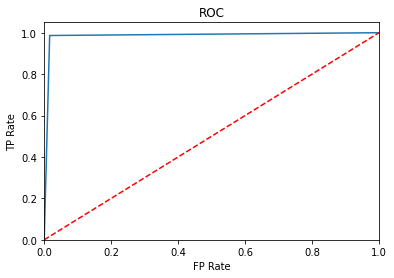

In [27]:
# The experiment were conducted using the Linear SVC with kernel paarameter (C=1.0, Kernel=linear, degree=3, gamma=auto)



SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto').fit(X_train_Tfidf,y_train)   # fit the training dataset.

prediction_SVM = SVM.predict(X_test_Tfidf)     # predict the labels on the class dataset



# Classification Report, confucion matrix, precision, recall, Roc AUC score:


print("Confusion Matrix\n")                           # checking the Confusion Matrix
print(confusion_matrix(y_test, prediction_SVM))

cr = classification_report(y_test, prediction_SVM)       # Printing the Classification Report
print("\n\nClassification Report\n")
print(cr)

auc_score = roc_auc_score(y_test, prediction_SVM)        # Printing  Auc score
print("\nROC AUC Score:",auc_score)

y_pred_proba = SVM.predict(X_test_Tfidf)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)        # obtaning Fp rate,Tp rate and the threshold values

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])                                            # Visualize the ROC curve.
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()

## Experimentation using RandomForest Classifier:

In [28]:
# Split into training and testing sets: 70% of training and 30% for testing: and Encoding the labels.

news_source = News_type_sample['news_title']
news_targets = News_type_sample['class']

X_train, X_test, y_train, y_test = train_test_split(news_source, news_targets, test_size=0.30, train_size=0.70, random_state=24)

In [29]:
# Count Vectorizer transformation

count_vec = CountVectorizer(stop_words='english', max_features=None)

count_vec = CountVectorizer()

xtrain_cv = count_vec.fit_transform(X_train)
xtest_cv = count_vec.transform(X_test)


xtrain_cv.shape

(7000, 58775)

In [30]:
# Tf-Idf Vectorizer (Convert text data in to vectors, since the  classifier only takes numerical data) 

Tfidf_vect = TfidfVectorizer(stop_words='english', max_features=None)     # Initialize a TfidfVectorizer object:

Tfidf_vect.fit(X_train)        

X_train_Tfidf = Tfidf_vect.transform(X_train)                      # Transform the training data: tfidf_train

X_test_Tfidf = Tfidf_vect.transform(X_test)                         # Transform the test data: tfidf_test 

X_train_Tfidf.shape

(7000, 58468)

Confusion Matrix

[[1542   50]
 [  92 1316]]


Classification Report

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1592
           1       0.96      0.93      0.95      1408

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000


ROC AUC Score: 0.9516260278666057


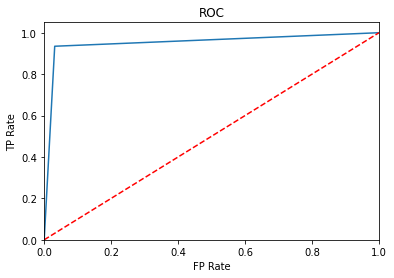

In [31]:
# classifier: RandomForest (RF):

Random_F = RandomForestClassifier(n_estimators = 10)

Random_F.fit(X_train_Tfidf,y_train)             # Training the model on the training dataset
                                                # fit function is used to train the model using the training sets as parameters
Random_F_pred = Random_F.predict(X_test_Tfidf)   # performing predictions on the test dataset


# Classification Report, confucion matrix, precision, recall, Roc AUC score:

print("Confusion Matrix\n")                           # checking the Confusion Matrix
print(confusion_matrix(y_test, Random_F_pred))


cr = classification_report(y_test, Random_F_pred)       # Printing the Classification Report
print("\n\nClassification Report\n")
print(cr)

auc_score = roc_auc_score(y_test, Random_F_pred)        # Printing  Auc score
print("\nROC AUC Score:",auc_score)

y_pred_proba = Random_F.predict(X_test_Tfidf)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)# obtaning Fp rate,Tp rate and the threshold values

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])                                     # Visualize the ROC curve.
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()